In [ ]:
import warnings
import sklearn.exceptions
warnings.filterwarnings("ignore", category=sklearn.exceptions.UndefinedMetricWarning)
 
 

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import svm

In [ ]:
df=pd.read_csv('data_arrhythmia.csv',delimiter=';',na_values = ['?'])

In [ ]:
df.head()

,age,sex,height,weight,qrs_duration,p-r_interval,q-t_interval,t_interval,p_interval,qrs,T,P,QRST,J,heart_rate,q_wave,r_wave,s_wave,R'_wave,S'_wave,AA,AB,AC,AD,AE,AF,AG,AH,AI,AJ,AK,AL,AM,AN,AO,AP,AR,AS,AT,AU,...,JO,JP,JR,JS,JT,JU,JV,JY,JZ,KA,KB,KC,KD,KE,KF,KG,KH,KI,KJ,KK,KL,KM,KN,KO,KP,KR,KS,KT,KU,KV,KY,KZ,LA,LB,LC,LD,LE,LF,LG,diagnosis
0,75,0,190,80,91,193,371,174,121,-16,13.0,64.0,-2.0,NaN,63.0,0,52,44,0,0,32,0,0,0,0,0,0,0,44,20,36,0,28,0,0,0,0,0,0,52,...,0.0,8.4,-10.0,0.0,0.0,0.6,5.9,-3.9,52.7,-0.3,0.0,15.2,-8.4,0.0,0.0,0.9,5.1,17.7,70.7,-0.4,0.0,13.5,-4.0,0.0,0,0.9,3.9,25.5,62.9,-0.3,0.0,9.0,-0.9,0.0,0,0.9,2.9,23.3,49.4,8
1,56,1,165,64,81,174,401,149,39,25,37.0,-17.0,31.0,NaN,53.0,0,48,0,0,0,24,0,0,0,0,0,0,0,64,0,0,0,24,0,0,0,0,0,0,32,...,0.0,5.8,-7.7,0.0,0.0,0.9,3.8,-5.7,27.7,-0.2,0.0,9.5,-5.0,0.0,0.0,0.5,2.6,11.8,34.6,-0.4,0.0,11.0,-2.4,0.0,0,0.4,2.6,21.6,43.4,-0.5,0.0,8.5,0.0,0.0,0,0.2,2.1,20.4,38.8,6
2,54,0,172,95,138,163,386,185,102,96,34.0,70.0,66.0,23.0,75.0,0,40,80,0,0,24,0,0,0,0,0,0,20,56,52,0,0,40,0,0,0,0,0,0,28,...,0.0,5.8,-4.1,4.0,-0.5,0.4,0.3,20.4,23.3,0.7,0.0,10.0,-5.7,0.0,0.0,0.5,2.2,-3.0,20.7,1.3,0.0,11.1,-3.4,0.0,0,0.4,3.4,11.5,48.2,0.9,0.0,9.5,-2.4,0.0,0,0.3,3.4,12.3,49.0,10
3,55,0,175,94,100,202,380,179,143,28,11.0,-5.0,20.0,NaN,71.0,0,72,20,0,0,48,0,0,0,0,0,0,0,64,36,0,0,36,0,0,0,0,0,0,20,...,0.0,9.0,-7.9,0.0,0.0,0.1,4.1,7.6,51.0,0.4,0.0,15.0,-5.5,0.0,0.0,0.1,3.3,28.8,63.1,0.1,0.0,15.2,-3.7,0.0,0,0.6,3.0,36.8,68.0,0.1,0.0,12.2,-2.2,0.0,0,0.4,2.6,34.6,61.6,1
4,75,0,190,80,88,181,360,177,103,-16,13.0,61.0,3.0,NaN,NaN,0,48,40,0,0,28,0,0,0,0,0,0,0,40,24,0,0,24,0,0,0,0,0,0,52,...,0.0,8.5,-10.2,0.0,0.0,-1.0,4.7,-4.0,43.0,-0.2,0.0,15.2,-7.8,0.0,0.0,-0.1,4.9,16.2,63.2,-0.2,0.0,9.1,-0.9,0.0,0,-0.2,2.9,21.7,48.9,-0.4,0.0,13.1,-3.6,0.0,0,-0.1,3.9,25.4,62.8,7


In [ ]:
df.shape

(452, 280)

In [ ]:
df.columns

Index(['age', 'sex', 'height', 'weight', 'qrs_duration', 'p-r_interval',
       'q-t_interval', 't_interval', 'p_interval', 'qrs',
       ...
       'KY', 'KZ', 'LA', 'LB', 'LC', 'LD', 'LE', 'LF', 'LG', 'diagnosis'],
      dtype='object', length=280)

In [ ]:
df.diagnosis.value_counts()

1     245
10     50
2      44
6      25
16     22
4      15
3      15
5      13
9       9
15      5
14      4
7       3
8       2
Name: diagnosis, dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452 entries, 0 to 451
Columns: 280 entries, age to diagnosis
dtypes: float64(121), int64(159)
memory usage: 988.9 KB


In [ ]:
df.dtypes

age               int64
sex               int64
height            int64
weight            int64
qrs_duration      int64
                 ...   
LD              float64
LE              float64
LF              float64
LG              float64
diagnosis         int64
Length: 280, dtype: object

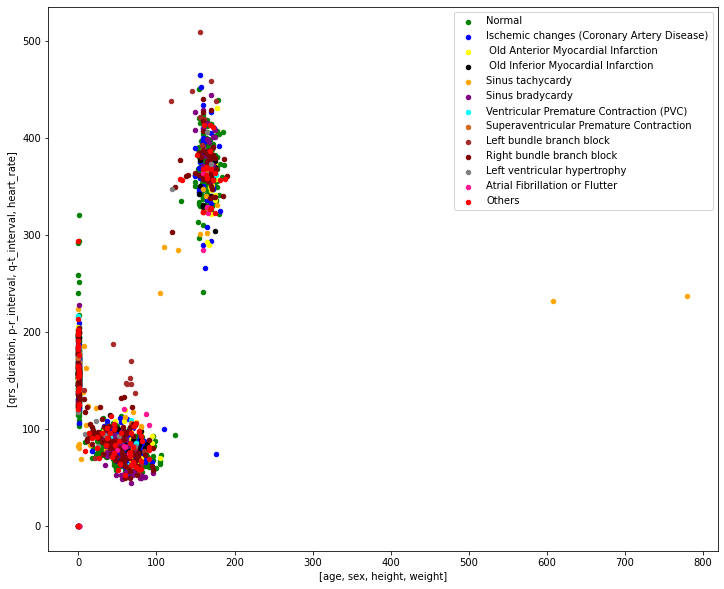

In [ ]:
class_1=df[df['diagnosis']==1][1:200]
class_2=df[df['diagnosis']==2][1:200]
class_3=df[df['diagnosis']==3][1:200]
class_4=df[df['diagnosis']==4][1:200]
class_5=df[df['diagnosis']==5][1:200]
class_6=df[df['diagnosis']==6][1:200]
class_7=df[df['diagnosis']==7][1:200]
class_8=df[df['diagnosis']==8][1:200]
class_9=df[df['diagnosis']==9][1:200]
class_10=df[df['diagnosis']==10][1:200]
class_14=df[df['diagnosis']==14][1:200]
class_15=df[df['diagnosis']==15][1:200]
class_16=df[df['diagnosis']==16][1:200]
ax_1=class_1.plot(kind="scatter",x=["age","sex","height","weight"],y=["qrs_duration","p-r_interval","q-t_interval","heart_rate"],color="green",figsize=(12, 10),label="Normal")
ax_2=class_2.plot(kind="scatter",x=["age","sex","height","weight"],y=["qrs_duration","p-r_interval","q-t_interval","heart_rate"],color="blue",figsize=(12, 10),label="Ischemic changes (Coronary Artery Disease)",ax=ax_1)
ax_3=class_3.plot(kind="scatter",x=["age","sex","height","weight"],y=["qrs_duration","p-r_interval","q-t_interval","heart_rate"],color="yellow",figsize=(12, 10),label=" Old Anterior Myocardial Infarction",ax=ax_2)
ax_4=class_4.plot(kind="scatter",x=["age","sex","height","weight"],y=["qrs_duration","p-r_interval","q-t_interval","heart_rate"],color="black",figsize=(12, 10),label=" Old Inferior Myocardial Infarction",ax=ax_3)
ax_5=class_5.plot(kind="scatter",x=["age","sex","height","weight"],y=["qrs_duration","p-r_interval","q-t_interval","heart_rate"],color="Orange",figsize=(12, 10),label="Sinus tachycardy",ax=ax_4)
ax_6=class_6.plot(kind="scatter",x=["age","sex","height","weight"],y=["qrs_duration","p-r_interval","q-t_interval","heart_rate"],color="Purple",figsize=(12, 10),label="Sinus bradycardy",ax=ax_5)
ax_7=class_7.plot(kind="scatter",x=["age","sex","height","weight"],y=["qrs_duration","p-r_interval","q-t_interval","heart_rate"],color="aqua",figsize=(12, 10),label="Ventricular Premature Contraction (PVC)",ax=ax_6)
ax_8=class_8.plot(kind="scatter",x=["age","sex","height","weight"],y=["qrs_duration","p-r_interval","q-t_interval","heart_rate"],color="chocolate",figsize=(12, 10),label="Superaventricular Premature Contraction",ax=ax_7)
ax_9=class_9.plot(kind="scatter",x=["age","sex","height","weight"],y=["qrs_duration","p-r_interval","q-t_interval","heart_rate"],color="brown",figsize=(12, 10),label="Left bundle branch block",ax=ax_8)
ax_10=class_10.plot(kind="scatter",x=["age","sex","height","weight"],y=["qrs_duration","p-r_interval","q-t_interval","heart_rate"],color="maroon",figsize=(12, 10),label="Right bundle branch block",ax=ax_9)
ax_14=class_14.plot(kind="scatter",x=["age","sex","height","weight"],y=["qrs_duration","p-r_interval","q-t_interval","heart_rate"],color="gray",figsize=(12, 10),label="Left ventricular hypertrophy",ax=ax_10)
ax_15=class_15.plot(kind="scatter",x=["age","sex","height","weight"],y=["qrs_duration","p-r_interval","q-t_interval","heart_rate"],color="deeppink",figsize=(12, 10),label="Atrial Fibrillation or Flutter",ax=ax_14)
ax_16=class_16.plot(kind="scatter",x=["age","sex","height","weight"],y=["qrs_duration","p-r_interval","q-t_interval","heart_rate"],color="red",figsize=(12, 10),label="Others",ax=ax_15)

In [ ]:
df = df.replace(np.nan, 0)

In [ ]:
df.drop(["J","R'_wave","S'_wave", "AB", "AC", "AD","AE", "AF", "AG", "AL", "AN", "AO", "AP", "AR", "AS", "AT", "AZ", "AB'", "BC", "BD", "BE", "BG", "BH", "BP", "BR", "BS", "BT", "BU", 
          "CA", "CD", "CE", "Cf", "CG", "CH", "CI", "CM","CN","CP","CR","CS","CT","CU","CV","DE","DF","DG","DH","DI","DJ","DR","DS","DT","DU","DV","DY","EG",
          "EH", "EL", "ER", "ET", "EU", "EV", "EY", "EZ", "FA", "FE", "FF", "FH", "FI", "FJ", "FK", "FL", "FM", "FR", "FS", "FU", "FV", "FY", "FZ", "GA",
          "GB", "GG", "GH", "HD", "HE", "HO", "IA", "IB", "IK", "IL", "IY", "JI", "JS", "JT", "KF", "KO", "KP", "LB", "LC", "T", "P", "QRST", "heart_rate"], axis=1, inplace=True)

In [ ]:
df.head()

,age,sex,height,weight,qrs_duration,p-r_interval,q-t_interval,t_interval,p_interval,qrs,q_wave,r_wave,s_wave,AA,AH,AI,AJ,AK,AM,AU,AV,AY,BB,BF,BI,BJ,BK,BL,BM,BN,BO,BV,BY,BZ,CB,CC,CJ,CK,CL,CO,...,JG,JH,JJ,JK,JL,JM,JN,JO,JP,JR,JU,JV,JY,JZ,KA,KB,KC,KD,KE,KG,KH,KI,KJ,KK,KL,KM,KN,KR,KS,KT,KU,KV,KY,KZ,LA,LD,LE,LF,LG,diagnosis
0,75,0,190,80,91,193,371,174,121,-16,0,52,44,32,0,44,20,36,28,52,40,0,60,0,52,0,0,0,0,0,0,0,56,36,0,32,48,32,0,56,...,-6.4,0.0,0.2,2.9,-12.6,15.2,-0.1,0.0,8.4,-10.0,0.6,5.9,-3.9,52.7,-0.3,0.0,15.2,-8.4,0.0,0.9,5.1,17.7,70.7,-0.4,0.0,13.5,-4.0,0.9,3.9,25.5,62.9,-0.3,0.0,9.0,-0.9,0.9,2.9,23.3,49.4,8
1,56,1,165,64,81,174,401,149,39,25,0,48,0,24,0,64,0,0,24,32,24,0,40,0,48,0,0,0,0,0,0,0,44,20,0,24,0,60,0,20,...,-7.9,0.0,0.8,2.0,-16.4,1.2,0.0,0.0,5.8,-7.7,0.9,3.8,-5.7,27.7,-0.2,0.0,9.5,-5.0,0.0,0.5,2.6,11.8,34.6,-0.4,0.0,11.0,-2.4,0.4,2.6,21.6,43.4,-0.5,0.0,8.5,0.0,0.2,2.1,20.4,38.8,6
2,54,0,172,95,138,163,386,185,102,96,0,40,80,24,20,56,52,0,40,28,116,0,52,0,52,64,0,0,0,88,0,0,36,92,0,24,0,128,0,24,...,-4.1,7.4,0.5,-2.4,20.9,-2.6,0.0,0.0,5.8,-4.1,0.4,0.3,20.4,23.3,0.7,0.0,10.0,-5.7,0.0,0.5,2.2,-3.0,20.7,1.3,0.0,11.1,-3.4,0.4,3.4,11.5,48.2,0.9,0.0,9.5,-2.4,0.3,3.4,12.3,49.0,10
3,55,0,175,94,100,202,380,179,143,28,0,72,20,48,0,64,36,0,36,20,52,48,56,0,64,32,0,0,0,72,0,0,60,12,0,44,0,60,44,32,...,-6.9,0.0,-0.5,2.9,-12.7,18.0,0.7,0.0,9.0,-7.9,0.1,4.1,7.6,51.0,0.4,0.0,15.0,-5.5,0.0,0.1,3.3,28.8,63.1,0.1,0.0,15.2,-3.7,0.6,3.0,36.8,68.0,0.1,0.0,12.2,-2.2,0.4,2.6,34.6,61.6,1
4,75,0,190,80,88,181,360,177,103,-16,0,48,40,28,0,40,24,0,24,52,36,0,60,0,48,28,0,0,0,56,0,0,48,36,0,28,44,0,0,0,...,-6.0,0.0,-0.7,2.1,-12.4,8.6,-0.5,0.0,8.5,-10.2,-1.0,4.7,-4.0,43.0,-0.2,0.0,15.2,-7.8,0.0,-0.1,4.9,16.2,63.2,-0.2,0.0,9.1,-0.9,-0.2,2.9,21.7,48.9,-0.4,0.0,13.1,-3.6,-0.1,3.9,25.4,62.8,7


In [ ]:
X = df.drop('diagnosis',axis=1)
y = df['diagnosis']

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)

In [ ]:
X_train.shape

(361, 176)

In [ ]:
y_train.shape

(361,)

In [ ]:
X_test.shape

(91, 176)

In [ ]:
y_test.shape

(91,)

In [ ]:
clf_svm=svm.SVC(kernel="linear",gamma="auto",C=2)
clf_svm.fit(X_train,y_train)
y_predict=clf_svm.predict(X_test)

In [ ]:
classification_report(y_test,y_predict)

'              precision    recall  f1-score   support\n\n           1       0.78      0.88      0.83        52\n           2       0.50      0.38      0.43         8\n           3       0.57      1.00      0.73         4\n           4       0.50      1.00      0.67         1\n           5       0.50      0.50      0.50         2\n           6       0.50      0.33      0.40         3\n           7       0.00      0.00      0.00         1\n           8       0.00      0.00      0.00         0\n           9       1.00      0.50      0.67         2\n          10       1.00      0.80      0.89        10\n          14       0.00      0.00      0.00         2\n          16       0.00      0.00      0.00         6\n\n    accuracy                           0.71        91\n   macro avg       0.45      0.45      0.43        91\nweighted avg       0.68      0.71      0.69        91\n'

In [ ]:
accuracy=accuracy_score(y_test,y_predict)*100

In [ ]:
accuracy

71.42857142857143